## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (可善用 google colab)，比較使用 CPU 與 GPU 的訓練速度

In [8]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [9]:
import os
import keras

# 請嘗試設定 GPU：os.environ


In [10]:
import os
import keras
from keras.datasets import cifar10

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
train, test = keras.datasets.cifar10.load_data()

In [11]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = 2*(((x - x.min()) / (x.max() - x.min()))-0.5) # 做 MinMax 化
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    




In [12]:
#from tensorflow import keras
#keras.utils.np_utils.to_categorical
from keras.utils import np_utils

x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
#y_train = np_utils.to_categorical(y_train)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [13]:
## Show enumerate
num_neurons=[512, 256, 256, 128, 128]
list(enumerate(num_neurons))

[(0, 512), (1, 256), (2, 256), (3, 128), (4, 128)]

In [14]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 256, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 256)               65792     
                                                                 
 hidden_layer4 (Dense)       (None, 128)               32896     
                                                                 
 hidden_layer5 (Dense)       (None, 128)               16512     
                                                                 
 output (Dense)              (None, 10)                1290  

In [15]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [17]:
from tensorflow import keras

In [18]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [19]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 4s 8ms/step - loss: 1.6894 - accuracy: 0.3975 - val_loss: 1.5343 - val_accuracy: 0.4556
Epoch 2/100
196/196 [==============================] - 1s 6ms/step - loss: 1.4635 - accuracy: 0.4809 - val_loss: 1.4450 - val_accuracy: 0.4925
Epoch 3/100
196/196 [==============================] - 1s 6ms/step - loss: 1.3431 - accuracy: 0.5242 - val_loss: 1.3968 - val_accuracy: 0.5054
Epoch 4/100
196/196 [==============================] - 1s 6ms/step - loss: 1.2468 - accuracy: 0.5570 - val_loss: 1.3665 - val_accuracy: 0.5166
Epoch 5/100
196/196 [==============================] - 1s 6ms/step - loss: 1.1612 - accuracy: 0.5906 - val_loss: 1.3653 - val_accuracy: 0.5249
Epoch 6/100
196/196 [==============================] - 1s 6ms/step - loss: 1.0810 - accuracy: 0.6154 - val_loss: 1.3631 - val_accuracy: 0.5320
Epoch 7/100
196/196 [==============================] - 1s 6ms/step - loss: 1.0064 - accuracy: 0.6416 - val_loss: 1.3527 - val_accuracy: 0.5446

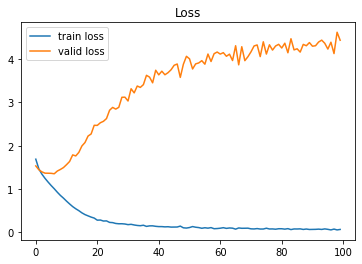

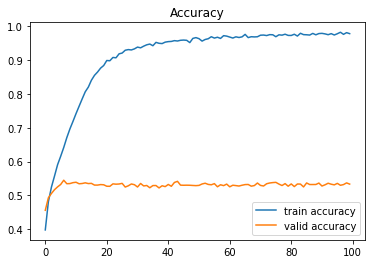

In [21]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()